<a href="https://colab.research.google.com/github/jarrydmartinx/ml-basics/blob/master/pi_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import time
import plotnine as gg

In [0]:
def pi_mc(num_samples: int) -> float:
  u = np.random.uniform(size=(num_samples, 2))

  lens_sq = np.sum(u ** 2, axis=1)

  num_insides = np.sum(lens_sq <= 1.)

  return 4 * (num_insides / num_samples)

pi_mc(int(1e7))


3.141234

In [0]:
def pi_riemann(num_intervals: int) -> float:
  width = 1 / num_intervals
  xs = np.linspace(0, 1, num=num_intervals, endpoint=False)
  ys = np.sqrt(1 - xs ** 2)

  return 4 * width * np.sum(ys)

pi_riemann(int(1e7))

3.1415928535526025

In [0]:
def pi_series(num_terms: int) -> float:
  signs = np.ones(num_terms)
  signs[1::2] = -1

  denoms = np.arange(1, num_terms * 2, 2)

  assert len(signs) == len(denoms)

  return 4 * np.sum(signs / denoms)

pi_series(int(1e7))

3.1415925535897977

In [0]:
NUM_TRIALS = 10

algs = {
    'monte_carlo': pi_mc,
    'riemann': pi_riemann,
    'gl_series': pi_series,
}

ns = np.logspace(1, 5, num=20, dtype=np.int32)
results = []

for alg_name in algs:
  for n in ns:
    for i in range(NUM_TRIALS):
      t = time.time()
      estimate = algs[alg_name](n)
      runtime = time.time() - t

      results.append({
          'alg': alg_name,
          'n': n,
          'runtime': runtime,
          'error': np.abs(estimate - np.pi)
      })

df = pd.DataFrame(results)

df = df.groupby(['alg', 'n'], as_index=False).agg({'error': np.mean,
                                                   'runtime': np.mean})
df.head()

,alg,n,error,runtime
0,gl_series,10,0.099753,0.000024
1,gl_series,16,0.062439,0.000020
2,gl_series,26,0.038447,0.000018
3,gl_series,42,0.023806,0.000017
4,gl_series,69,0.014492,0.000018


/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


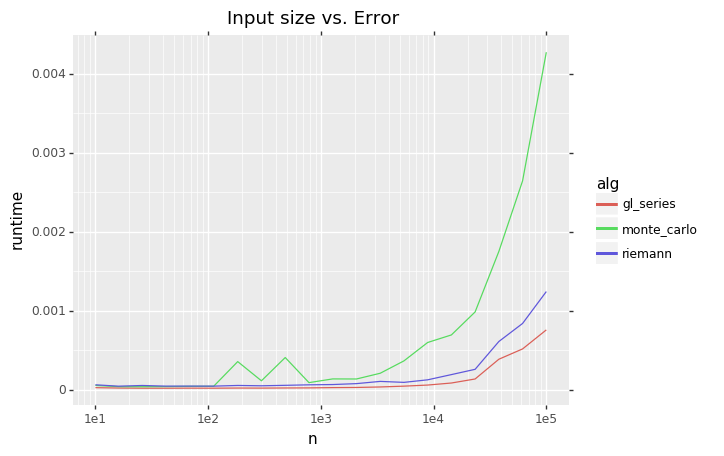

<ggplot: (-9223363294666028228)>

In [0]:
plot = (gg.ggplot(df)
        + gg.aes(x='n', y='runtime', color='alg')
        + gg.ggtitle('Input size vs. Error')
        + gg.geom_line()
        + gg.scale_x_log10()
        # + gg.scale_y_log10()
)
plot